<a href="https://colab.research.google.com/github/ainesko/NGS-HW/blob/main/NGS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Результаты


*   Покрытие генома
*   Процент ошибок
*   Распределение типов замен
*   Распределение длин инделов



In [60]:
data = {'Среднее покрытие':[28.325,
                             40.052],
        
        'Доля покрытой области генома':['100%',
                              '100%'],
        
        'Процент ошибок':['7.93%',
                              '10.39%'],
        
        'Средняя длина делеции':[1.727,
                             1.555],
        
        'Средняя длина вставки':[1.884,
                             1.2]}

df = pd.DataFrame(data, index =['Oxford Nanopores',
                                'PacBio'])
df

,Среднее покрытие,Доля покрытой области генома,Процент ошибок,Средняя длина делеции,Средняя длина вставки
Oxford Nanopores,28.325,100%,7.93%,1.727,1.884
PacBio,40.052,100%,10.39%,1.555,1.200


#Скачивание файлов с диска


По ссылкам скачиваем с гугл-диска все файлы (кажется, работает только для Google Colab)

In [1]:
def download_from_disk(id):
  import gdown
  gdown.download(f'https://drive.google.com/uc?id={id}&confirm=t', quiet=False)

In [2]:
download_from_disk('1a18Uwzy-Dz10OmQZwsLrX4sntOuBxnew')

Downloading...
From: https://drive.google.com/uc?id=1a18Uwzy-Dz10OmQZwsLrX4sntOuBxnew&confirm=t
To: /content/ONT_2D.fastq.gz
100%|██████████| 143M/143M [00:00<00:00, 176MB/s]


In [3]:
download_from_disk('18VFr3uyICex0Xd8_rH6Tdhmr3GFIPr7C')

Downloading...
From: https://drive.google.com/uc?id=18VFr3uyICex0Xd8_rH6Tdhmr3GFIPr7C&confirm=t
To: /content/pacbio_40x.fq.gz
100%|██████████| 198M/198M [00:02<00:00, 96.0MB/s]


In [4]:
download_from_disk('1unVHbhqU47hAGEY_wzbdBababBYNB5Df')

Downloading...
From: https://drive.google.com/uc?id=1unVHbhqU47hAGEY_wzbdBababBYNB5Df&confirm=t
To: /content/reference.fasta
100%|██████████| 4.71M/4.71M [00:00<00:00, 7.92MB/s]


# Установка программ

In [4]:
!pip install -q condacolab

In [5]:
import condacolab

In [6]:
condacolab.install()

✨🍰✨ Everything looks OK!


In [7]:
!conda install -c bioconda minimap2

Solving environment: - \ | / - \ | / - done

# All requested packages already installed.



In [8]:
!conda install -c bioconda samtools

Solving environment: - \ | / - \ | / - \ | / - done

# All requested packages already installed.



In [9]:
!apt-get install bowtie2 samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bowtie2 is already the newest version (2.3.4.1-1).
samtools is already the newest version (1.7-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [10]:
!pip install pysam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 0. Разобраться с minimap2

**Oxford Nanopores**

In [12]:
!minimap2 -d ref.mmi reference.fasta  

[M::mm_idx_gen::0.197*1.02] collected minimizers
[M::mm_idx_gen::0.247*1.21] sorted minimizers
[M::main::0.302*1.17] loaded/built the index for 1 target sequence(s)
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.315*1.17] distinct minimizers: 838533 (98.18% are singletons); average occurrences: 1.034; average spacing: 5.352
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -d ref.mmi reference.fasta
[M::main] Real time: 0.324 sec; CPU: 0.376 sec; Peak RSS: 0.079 GB


In [13]:
! minimap2 -Y -c --MD -ax map-ont reference.fasta ONT_2D.fastq.gz > ont_alignment.sam

[M::mm_idx_gen::0.193*1.00] collected minimizers
[M::mm_idx_gen::0.247*1.19] sorted minimizers
[M::main::0.247*1.18] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.263*1.17] mid_occ = 11
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.279*1.16] distinct minimizers: 838533 (98.18% are singletons); average occurrences: 1.034; average spacing: 5.352
[M::worker_pipeline::50.226*1.86] mapped 30810 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -Y -c --MD -ax map-ont reference.fasta ONT_2D.fastq.gz
[M::main] Real time: 50.254 sec; CPU: 93.527 sec; Peak RSS: 0.949 GB


In [14]:
!samtools view -bS -o ont_alignment.bam ont_alignment.sam

In [15]:
!samtools sort -o ont_alignment_sorted.bam ont_alignment.bam

In [16]:
!samtools index ont_alignment_sorted.bam

In [17]:
!samtools flagstat ont_alignment_sorted.bam

32103 + 0 in total (QC-passed reads + QC-failed reads)
1072 + 0 secondary
221 + 0 supplementary
0 + 0 duplicates
29565 + 0 mapped (92.09% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


**PacBio**

In [18]:
! minimap2 -Y -c --MD -ax map-pb reference.fasta pacbio_40x.fq.gz > pacbio_alignment.sam

[M::mm_idx_gen::0.176*1.00] collected minimizers
[M::mm_idx_gen::0.204*1.13] sorted minimizers
[M::main::0.204*1.13] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.214*1.12] mid_occ = 11
[M::mm_idx_stat] kmer size: 19; skip: 10; is_hpc: 1; #seq: 1
[M::mm_idx_stat::0.221*1.12] distinct minimizers: 606828 (98.95% are singletons); average occurrences: 1.024; average spacing: 7.468
[M::worker_pipeline::144.617*1.88] mapped 41447 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -Y -c --MD -ax map-pb reference.fasta pacbio_40x.fq.gz
[M::main] Real time: 144.717 sec; CPU: 271.778 sec; Peak RSS: 1.654 GB


In [19]:
!samtools view -bS -o pacbio_alignment.bam pacbio_alignment.sam

In [20]:
!samtools sort -o pacbio_alignment_sorted.bam pacbio_alignment.bam

[bam_sort_core] merging from 2 files...


In [21]:
!samtools index pacbio_alignment_sorted.bam

In [22]:
!samtools flagstat pacbio_alignment_sorted.bam

52081 + 0 in total (QC-passed reads + QC-failed reads)
1736 + 0 secondary
8898 + 0 supplementary
0 + 0 duplicates
51199 + 0 mapped (98.31% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [11]:
import pysam
import matplotlib.pyplot as plt
import matplotlib
import statistics
import numpy as np
from collections import defaultdict, Counter
import pandas as pd
import seaborn as sns

In [24]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 270 kB 5.2 MB/s 
     |████████████████████████████████| 2.3 MB 67.7 MB/s 
     |████████████████████████████████| 15.7 MB 41.6 MB/s 


In [12]:
from Bio import SeqIO

In [13]:
data = {'Общее число ридов':[32103,
                             52081],
        
        'Приложившиеся':['29565 (92.09%)',
                              '51199 (98.31%)']}

df = pd.DataFrame(data, index =['Oxford Nanopores',
                                'PacBio'])
df

,Общее число ридов,Приложившиеся
Oxford Nanopores,32103,29565 (92.09%)
PacBio,52081,51199 (98.31%)


# 1. Статистики ридов PacBio и Oxford Nanopores.

In [16]:
reference = SeqIO.read('reference.fasta', 'fasta').seq

In [39]:
def coverage(file):
    align = pysam.AlignmentFile(file, 'rb')
    cover = {}
    for read in align.fetch():
        start, end = read.reference_start, read.reference_end
        if start and end :
            for i in range(start, end):
                if i in cover:
                    cover[i] += 1
                else:
                    cover[i] = 1
    print('Среднее покрытие =', round(np.array(list(cover.values())).mean(), 3))
    print('Доля покрытого генома =', round(len(cover.keys()) / len(reference), 3))
    sns.set(rc={'figure.figsize':(15, 10)})
    sns.lineplot(list(cover.keys()), list(cover.values()))

Среднее покрытие = 40.052
Доля покрытого генома = 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


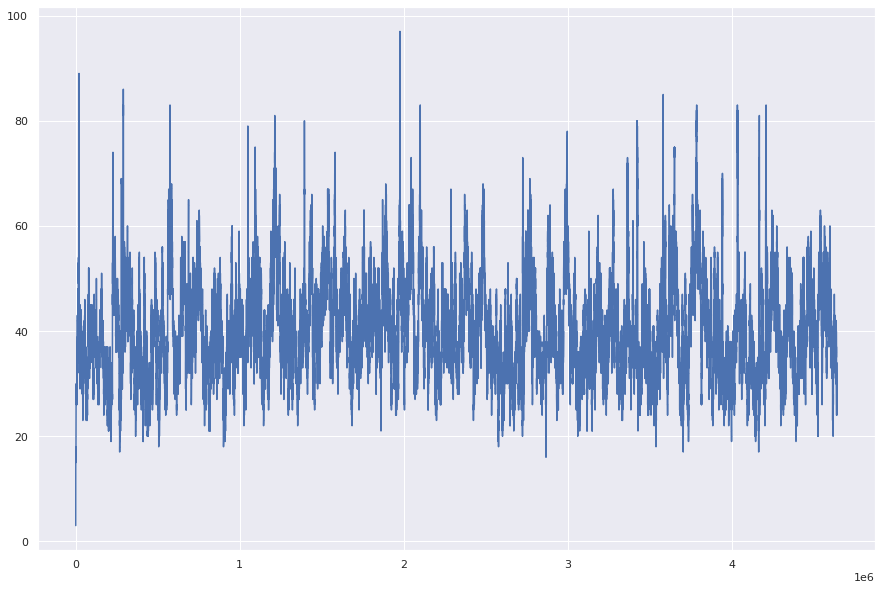

In [40]:
pacbio = coverage('pacbio_alignment.sam')

Среднее покрытие = 28.325
Доля покрытого генома = 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


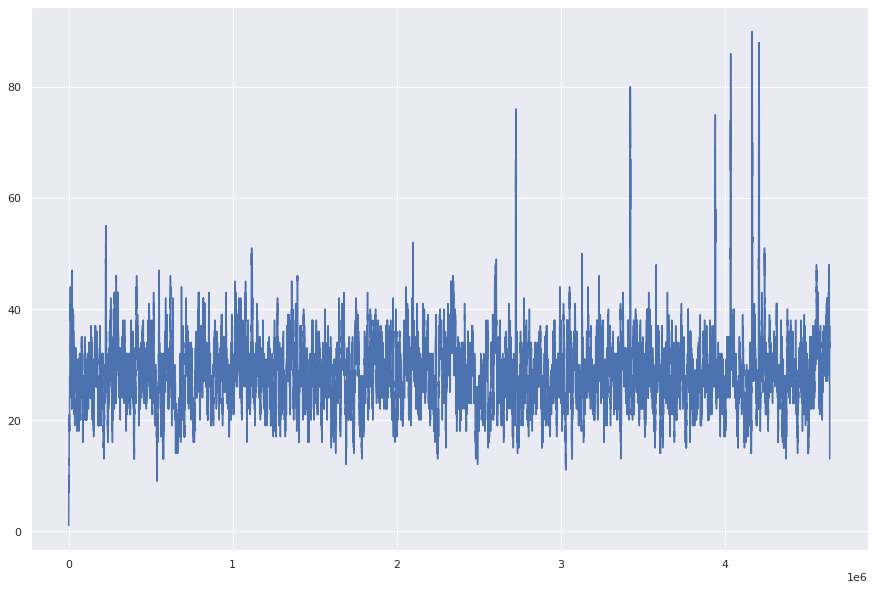

In [41]:
ont = coverage('ont_alignment.sam')

In [42]:
data = {'Среднее покрытие':[28.325,
                             40.052],
        
        'Доля покрытой области генома':['100%',
                              '100%']}

df = pd.DataFrame(data, index =['Oxford Nanopores',
                                'PacBio'])
df

,Среднее покрытие,Доля покрытой области генома
Oxford Nanopores,28.325,100%
PacBio,40.052,100%


## 2) Процент ошибок

In [14]:
def errors(file):
    bam = pysam.AlignmentFile(file, 'rb')
    letters = ['a', 't', 'c', 'g']
    errs = []
    pairs_n = []
    df = pd.DataFrame(np.zeros((5, 5)).astype(int), index = ['A', 'T', 'C', 'G', '-'], columns = ['A', 'T', 'C', 'G', '-'])   
    for line in bam.fetch(bam.get_reference_name(0)):
        ci,  err = 0, 0
        cigar = line.cigartuples
        read_len = line.query_length
        pairs = line.get_aligned_pairs(with_seq=True)
        qual = line.query_alignment_qualities
        for s in cigar: 
            if s[0] == 0: 
                for ip, p in enumerate(pairs[ci:ci + s[1]]):
                    if p[2] in letters:
                        df.loc[line.query_sequence[p[0]], p[2].upper()] += 1
                        err += 1
            elif s[0] == 1:
                err += s[1]
                for ip, p in enumerate(pairs[ci:ci + s[1]]):
                    if p[0] is not None:
                        df.loc[line.query_sequence[p[0]], '-'] += 1
            elif s[0] == 2:
                err += s[1]
                for p in pairs[ci:ci + s[1]]:
                    if p[2] is not None:
                        df.loc['-', p[2].upper()] += 1
            ci += s[1]
        errs.append(err / read_len)
        
    print(f'Процент ошибок = {round(np.mean(errs) * 100, 2)}')
    return df
    

In [15]:
errors('ont_alignment_sorted.bam')

Процент ошибок = 7.93


,A,T,C,G,-
A,0,110388,139961,326092,410542
T,108115,0,346831,129393,406322
C,115569,379303,0,93739,389995
G,374902,114069,87576,0,407020
-,1628114,1623745,1558527,1584088,0


In [16]:
errors('pacbio_alignment_sorted.bam')

Процент ошибок = 10.39


,A,T,C,G,-
A,0,293076,469562,332883,4011908
T,293065,0,332423,462468,4001714
C,362042,316460,0,426388,4706056
G,314646,367469,424447,0,4708271
-,1468795,1464530,2115301,2110350,0


## 3) Распределение типов замен

Стало жалко удалять эти таблички :) 

Но с их помощью получаются некорректные ошибки (нужно учитывать вставки и удаления). Вообще таблички похожи на таблички сверху, небольшие различия могут объясняться чуть другим выравниванием или другим подходом.

In [19]:
def nucl_repl(file):
  samfile = pysam.AlignmentFile(file, "r")
  df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
  pairs = []
  for read in samfile.fetch():
    if not read.is_unmapped and read.seq is not None:
        ref = read.get_reference_sequence()
        for read_nucleotide_idx, _, ref_nucleotide in read.get_aligned_pairs(matches_only=True, with_seq=True):
                read_nucleotide = read.query[read_nucleotide_idx - read.query_alignment_start].upper()
                if read_nucleotide.upper() != ref_nucleotide.upper() and read_nucleotide.upper() != 'N':
                    pairs.append([read_nucleotide.upper(), ref_nucleotide.upper()])
  df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
  df.loc['A', 'C'] = pairs.count(['A', 'C'])
  df.loc['A', 'G'] = pairs.count(['A', 'G'])
  df.loc['A', 'T'] = pairs.count(['A', 'T'])
  df.loc['C', 'A'] = pairs.count(['C', 'A'])
  df.loc['C', 'G'] = pairs.count(['C', 'G'])
  df.loc['C', 'T'] = pairs.count(['C', 'T']) 
  df.loc['G', 'A'] = pairs.count(['G', 'A'])
  df.loc['G', 'C'] = pairs.count(['G', 'C'])
  df.loc['G', 'T'] = pairs.count(['G', 'T'])
  df.loc['T', 'A'] = pairs.count(['T', 'A'])
  df.loc['T', 'C'] = pairs.count(['T', 'C'])
  df.loc['T', 'G'] = pairs.count(['T', 'G'])

  return df 

***Oxford Nanopores***

In [ ]:
nucl_repl('ont_alignment.sam')

,A,T,C,G
A,0,107765,137046,319761
T,105373,0,340675,126487
C,112963,372780,0,91353
G,368487,111447,85027,0


***PacBio***

In [ ]:
nucl_repl('pacbio_alignment.sam')

,A,T,C,G
A,0,285699,457338,322254
T,285427,0,321990,450152
C,354487,309393,0,415583
G,307539,359744,414331,0


## 4) Распределение длин инделов

***Oxford Nanopores***

In [21]:
!samtools stats ont_alignment_sorted.bam | grep ID > ont_stats.txt

In [27]:
def indel(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 1)
    COUNT = [0] * (len(l) - 1)
    sum_DEL = 0
    count_DEL = 0
    sum_INS = 0
    count_INS = 0
    for i in range(1, len(l)):
      a = l[i].split('\t')
      IS[i - 1] = int(a[1])
      sum_DEL += int(a[1]) * int(a[2])
      sum_INS += int(a[1]) * int(a[3])
      count_DEL += int(a[2])
      count_INS += int(a[3])
      COUNT[i - 1] = int(a[2]) + int(a[3])
  mean_DEL = sum_DEL / count_DEL
  mean_INS = sum_INS / count_INS
  print(f'Средняя длина делеции = {round(mean_DEL, 3)}', f'Средняя длина вставки = {round(mean_INS, 3)}')
  df = pd.DataFrame()
  df['indel size'] = IS
  df['count'] = COUNT
  sns.set(rc={'figure.figsize':(15, 10)})
  sns.lineplot(data=df, x=df['indel size'], y=df['count'])

Средняя длина делеции = 1.727 Средняя длина вставки = 1.884


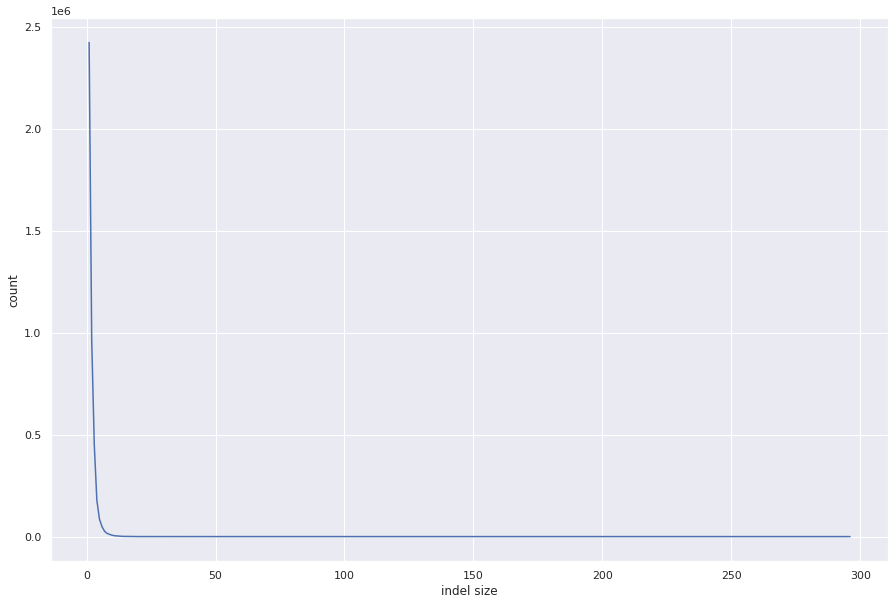

In [28]:
indel('ont_stats.txt')

In [54]:
def indelcut(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * 16
    COUNT = [0] * 16
    sum_DEL = 0
    count_DEL = 0
    sum_INS = 0
    count_INS = 0
    for i in range(11, 27):
      a = l[i].split('\t')
      IS[i - 11] = int(a[1])
      sum_DEL += int(a[1]) * int(a[2])
      sum_INS += int(a[1]) * int(a[3])
      count_DEL += int(a[2])
      count_INS += int(a[3])
      COUNT[i - 11] = int(a[2]) + int(a[3])
  mean_DEL = sum_DEL / count_DEL
  mean_INS = sum_INS / count_INS
  print(f'Средняя длина делеции = {round(mean_DEL, 3)}', f'Средняя длина вставки = {round(mean_INS, 3)}')
  df = pd.DataFrame()
  df['indel size'] = IS
  df['count'] = COUNT
  sns.lineplot(data=df, x=df['indel size'], y=df['count'])

Поскольку основной объём значений приходится на маленькие (0-5) размеры делеций и вставок, что можно сказать как по head, так по графику и средней длине, то отобразим промежуточную часть между резким падением в начале и почти постоянным значением (1-2) в конце, а именно размеры 10-25

Средняя длина делеции = 12.886 Средняя длина вставки = 13.395


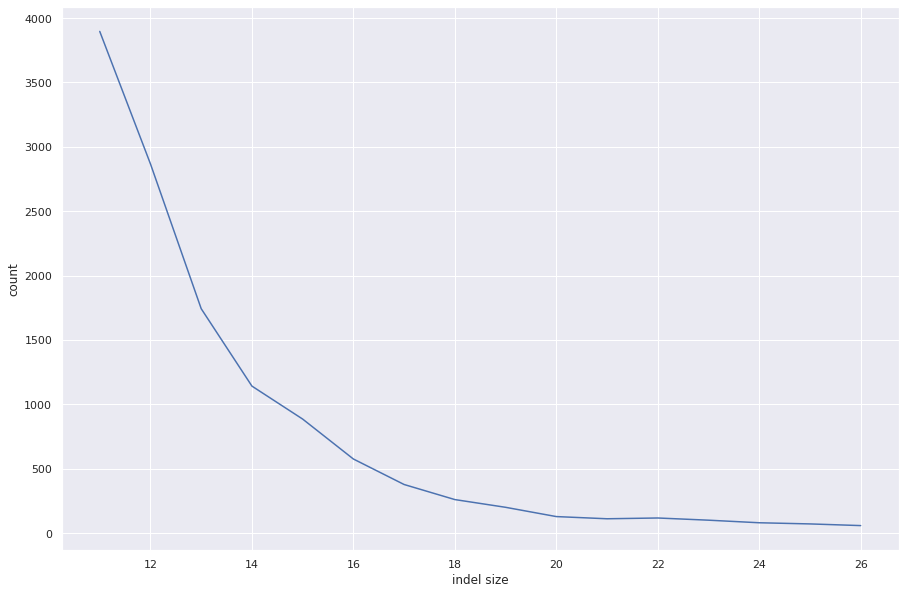

In [55]:
indelcut('ont_stats.txt')

***PacBio***

In [29]:
!samtools stats pacbio_alignment_sorted.bam | grep ID > pacbio_stats.txt

Средняя длина делеции = 1.555 Средняя длина вставки = 1.2


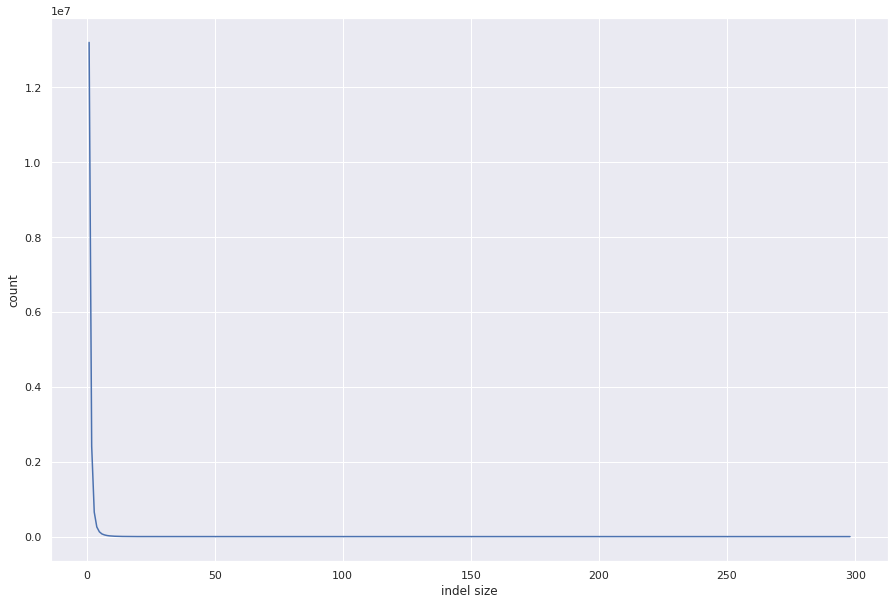

In [30]:
indel('pacbio_stats.txt')

In [56]:
def indelcut(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * 83
    COUNT = [0] * 83
    sum_DEL = 0
    count_DEL = 0
    sum_INS = 0
    count_INS = 0
    for i in range(17, 100):
      a = l[i].split('\t')
      IS[i - 17] = int(a[1])
      sum_DEL += int(a[1]) * int(a[2])
      sum_INS += int(a[1]) * int(a[3])
      count_DEL += int(a[2])
      count_INS += int(a[3])
      COUNT[i - 17] = int(a[2]) + int(a[3])
  mean_DEL = sum_DEL / count_DEL
  mean_INS = sum_INS / count_INS
  print(f'Средняя длина делеции = {round(mean_DEL, 3)}', f'Средняя длина вставки = {round(mean_INS, 3)}')
  df = pd.DataFrame()
  df['indel size'] = IS
  df['count'] = COUNT
  sns.lineplot(data=df, x=df['indel size'], y=df['count'])

В этом файле бОльшие срезы дают достаточно информации. Например, то значения 20 резкое падение, а затем спуск по кочкам. Дальнейшее увеличение рамки сглаживает неровности, становится менее интересно.

Средняя длина делеции = 33.469 Средняя длина вставки = 33.906


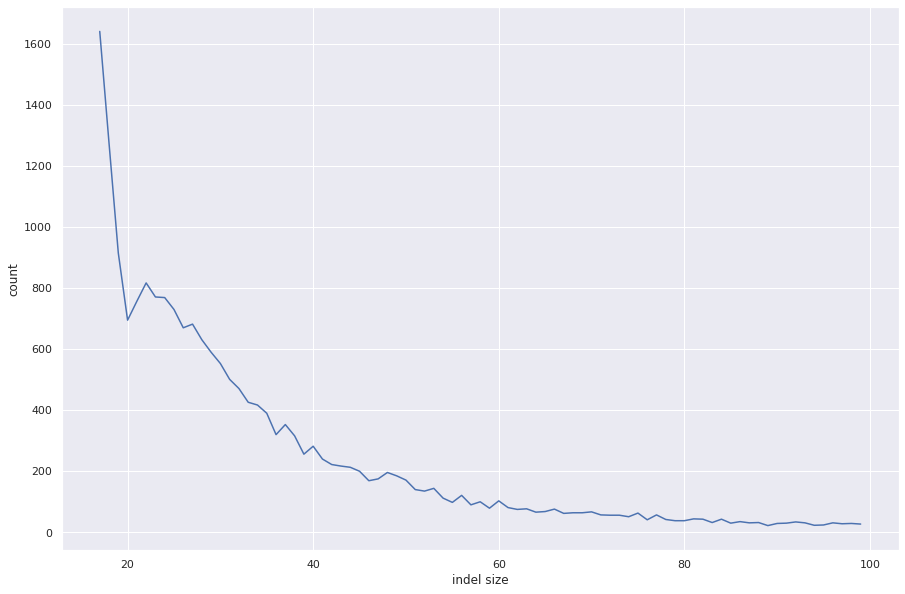

In [57]:
indelcut('pacbio_stats.txt')

## Сравнение результатов

У PacBio, вероятно, в силу того, что среднее покрытие больше, более интересен график распределение инделов. Вообще у PacBio при большем количестве ридов большее их приложение и прочее. В обоих случаях инделы сосредоточены в районе длины 1-2, а дальше количество падает.

In [31]:
data = {'Среднее покрытие':[28.325,
                             40.052],
        
        'Доля покрытой области генома':['100%',
                              '100%'],
        
        'Процент ошибок':['7.93%',
                              '10.39%'],
        
        'Средняя длина делеции':[1.727,
                             1.555],
        
        'Средняя длина вставки':[1.884,
                             1.2]}

df = pd.DataFrame(data, index =['Oxford Nanopores',
                                'PacBio'])
df

,Среднее покрытие,Доля покрытой области генома,Процент ошибок,Средняя длина делеции,Средняя длина вставки
Oxford Nanopores,28.325,100%,7.93%,1.727,1.884
PacBio,40.052,100%,10.39%,1.555,1.200
